# Análisis Bivariante

   El análisis bivariante es una técnica estadística que estudia la relación entre dos variables. Es el paso natural después de describir cada variable por separado (análisis univariante) y antes de modelar relaciones más complejas (multivariante).

---

### Qué es el análisis bivariante

   Es el conjunto de métodos que permiten analizar cómo se comportan dos variables juntas, es decir, si están relacionadas y de qué manera.

   Puede aplicarse tanto a variables categóricas, numéricas o mixtas, y para cada caso hay técnicas distintas.

---

### Para qué sirve

   Sirve para:

   ✔️ Identificar relaciones o asociaciones

      Por ejemplo:

         - ¿Las ventas aumentan cuando sube la inversión en marketing?

         - ¿La edad influye en la probabilidad de comprar un producto?

         - ¿Hay asociación entre el género y un tipo de preferencia?

   ✔️ Medir la fuerza de la relación

   No todas las relaciones son igual de fuertes. El análisis bivariante permite medir cuánto dependen las variables entre sí.

   ✔️ Detectar patrones y tendencias

   Especialmente útil en análisis exploratorio de datos, machine learning y estudios estadísticos.

   ✔️ Preparar el terreno para modelos más avanzados

   Ayuda a decidir qué variables incluir en modelos predictivos o explicativos.

---

### Cómo se usa (métodos según el tipo de variables)

   🔹 1. Si ambas variables son numéricas

   Aquí se busca ver si suben y bajan juntas, linealmente o no.

   Métodos:

   - Diagrama de dispersión (scatter plot) → visualiza la relación.

   - Correlación de Pearson → mide relación lineal (de −1 a 1).

   - Correlación de Spearman → si la relación no es lineal o hay outliers.

   - Regresión lineal simple → modela una recta que relaciona X con Y.

      Ejemplo:
         Ingresos ↔ Edad, estatura ↔ peso, horas estudiadas ↔ nota.

   🔹 2. Si ambas variables son categóricas

   Aquí interesa saber si existe asociación entre categorías.

   Métodos:

   - Tablas de contingencia → cruza categorías.

   - Chi-cuadrado de independencia → mide si la asociación es significativa.

   - Medidas de asociación: Cramér’s V, coeficiente Phi, etc.

      Ejemplo:
         Género ↔ tipo de producto comprado, nivel educativo ↔ estado laboral.

   🔹 3. Una variable numérica y otra categórica

   Aquí se compara cómo cambia la variable numérica entre grupos.

   Métodos:

   - Comparación de medias (t-test para dos grupos, ANOVA para varios).

   - Boxplots por categoría.

   - Regresión lineal con variable dummy.

      Ejemplo:
         Salario ↔ género, tiempo de entrega ↔ tipo de servicio.

---

### Pasos prácticos para hacer un análisis bivariante

   1. Identificar el tipo de variables (numérica/categórica).

   2. Aplicar la técnica adecuada según la combinación.

   3. Visualizar (gráficos de dispersión, boxplots, barras, etc.).

   4. Calcular la medida de relación (correlación, chi-cuadrado, V de Cramér…).

   5. Interpretar los resultados:

      - ¿Hay relación?

      - ¿Es fuerte?

      - ¿Tiene sentido práctico?

   6. Tomar decisiones (modelos, segmentación, cambios en el producto…).

---




# Ejemplos con código

### 1. Análisis bivariante con variables numéricas
✔️ Relación entre dos variables numéricas (correlación + scatterplot)

              HorasEstudio      Nota
HorasEstudio      1.000000  0.657065
Nota              0.657065  1.000000


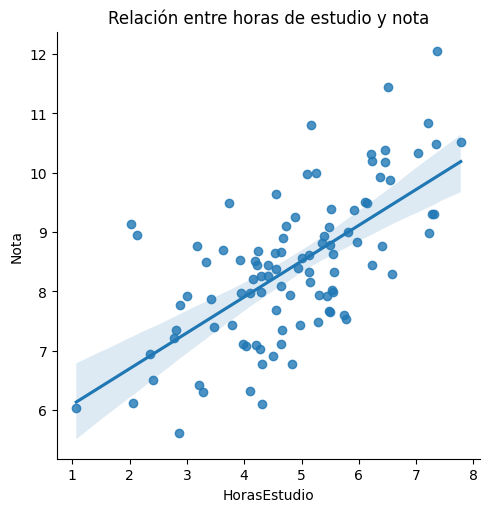

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos simulados
np.random.seed(42)
horas_estudio = np.random.normal(5, 1.5, 100)
nota = 5 + 0.7 * horas_estudio + np.random.normal(0, 1, 100)

df = pd.DataFrame({
    "HorasEstudio": horas_estudio,
    "Nota": nota
})

# Correlación
print(df.corr())

# Gráfico de dispersión con línea de regresión
sns.lmplot(data=df, x="HorasEstudio", y="Nota", height=5)
plt.title("Relación entre horas de estudio y nota")
plt.show()

    Qué se consigue aquí:

       - La correlación te dice si hay relación lineal.

       - El lmplot muestra el scatterplot + tendencia.

### 2. Análisis bivariante con una numérica y una categórica
✔️ Comparar una variable numérica entre grupos (boxplot + medias)

Genero
Hombre    2052.595445
Mujer     1927.044871
Name: Salario, dtype: float64


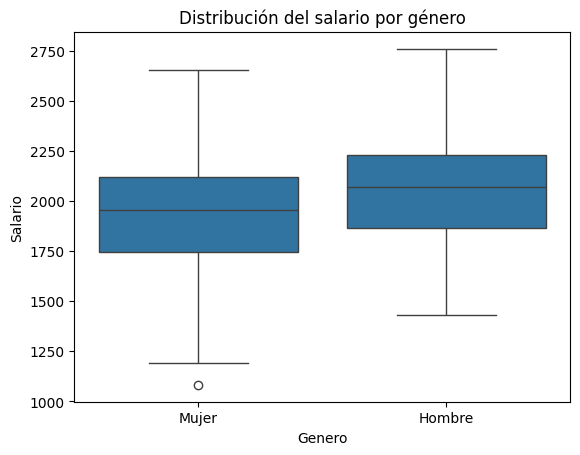

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos simulados
np.random.seed(1)
df = pd.DataFrame({
    "Genero": np.random.choice(["Hombre", "Mujer"], 200),
    "Salario": np.random.normal(2000, 300, 200)
})

# Ajuste pequeño para simular diferencia realista
df.loc[df["Genero"] == "Mujer", "Salario"] -= 80  

# Comparar medias
print(df.groupby("Genero")["Salario"].mean())

# Boxplot
sns.boxplot(data=df, x="Genero", y="Salario")
plt.title("Distribución del salario por género")
plt.show()


    Qué aporta:

       - Diferencia visual en la distribución salarial.

       - Agrupación por medias para cuantificar la diferencia.

### 3. Análisis bivariante con dos variables categóricas
✔️ Tabla de contingencia + mapa de calor

Preferencia  Cine  Documentales  Series
Genero                                 
Hombre         31            33      33
Mujer          34            35      34


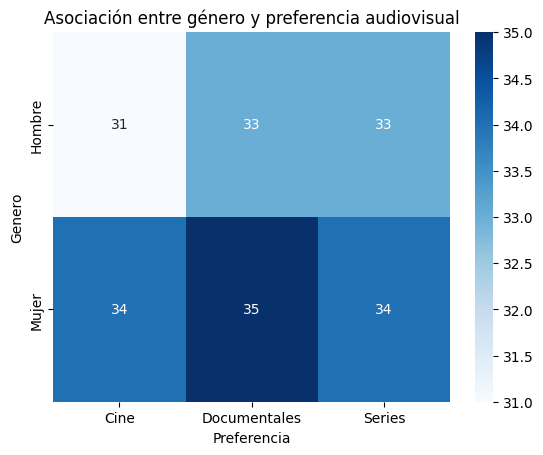

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos simulados
df = pd.DataFrame({
    "Genero": np.random.choice(["Hombre", "Mujer"], 200),
    "Preferencia": np.random.choice(["Cine", "Series", "Documentales"], 200)
})

# Tabla de contingencia
tabla = pd.crosstab(df["Genero"], df["Preferencia"])
print(tabla)

# Heatmap
sns.heatmap(tabla, annot=True, cmap="Blues")
plt.title("Asociación entre género y preferencia audiovisual")
plt.show()


    Qué aporta:

       - Muestra visualmente si ciertos grupos prefieren categorías determinadas.

### 4. Regresión lineal simple con Seaborn

Seaborn permite hacer una regresión rápida para ver tendencia:

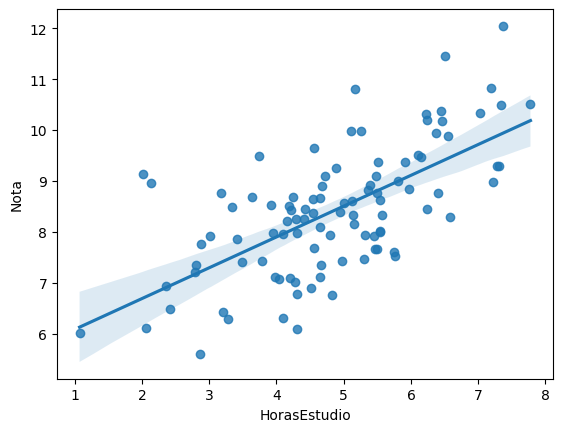

In [6]:
sns.regplot(data=df, x="HorasEstudio", y="Nota")
plt.show()

### 5. Pairplot (análisis bivariante múltiple)

Muy útil cuando quieres ver todas las relaciones entre varias variables numéricas.

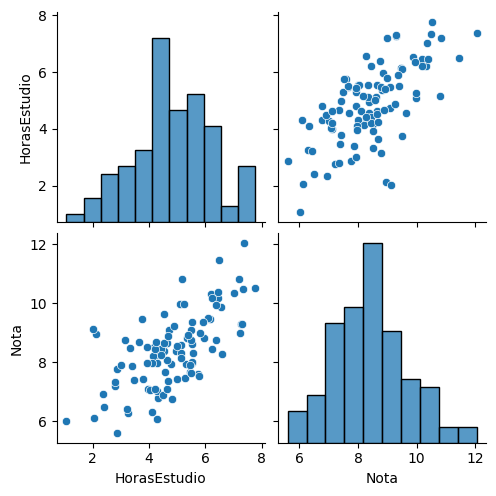

In [7]:
sns.pairplot(df)
plt.show()

--- 

# Análisis de Datos (Bivariante): Solo categóricas

### 1. Qué significa que las dos variables sean categóricas

Son variables que clasifican observaciones en grupos, sin valores numéricos (o sin que los valores numéricos tengan significado matemático).

Cuando ambas variables son así, el análisis bivariante busca responder:

✔️ ¿Existe asociación entre las dos variables?
✔️ ¿Es fuerte la asociación o apenas existe relación?
✔️ ¿Qué combinaciones de categorías aparecen más o menos de lo esperable?

---

### 2. Herramienta principal: la tabla de contingencia

Es el centro de todo el análisis.

Ejemplo simple:

|            | Cine | Series | Documentales |
| ---------- | ---- | ------ | ------------ |
| **Hombre** | 40   | 25     | 10           |
| **Mujer**  | 45   | 55     | 25           |

Esta tabla cruza:

   - filas → variable 1

   - columnas → variable 2

   - celdas → conteos de observaciones
    (número de personas que cumplen ambas categorías)

¿Por qué es tan útil?

Porque te permite ver:

   - tendencias (ej.: las mujeres ven más series),

   - distribuciones,

   - valores esperados para contrastes estadísticos.

---

### 3. Test estadístico clave: Chi-cuadrado de independencia

Sirve para determinar si la asociación que ves en la tabla de contingencia es real o fruto del azar.

Hipótesis del test:

   - H0 (nula): las variables son independientes.

   - H1 (alternativa): las variables están asociadas.

El test compara:

   - frecuencias observadas (tabla real)

   - vs. frecuencias esperadas (tabla que habría si no hubiera relación)

Si la diferencia es grande → chi-cuadrado alto → p-valor bajo → hay asociación.

Qué te dice:

| Resultado del p-valor | Interpretación                  |
| --------------------- | ------------------------------- |
| p < 0.05              | Existe asociación significativa |
| p >= 0.05             | No hay evidencia de relación    |

---

### 4. Medidas de fuerza de la asociación

El test chi-cuadrado solo dice si la relación existe, no cuán fuerte es.

Para medir la intensidad usamos:

✔️ Phi (φ)

   - Para tablas 2×2

   - Valores: 0 → no relación, 1 → relación perfecta

✔️ V de Cramér (V)

   - Para cualquier tamaño de tabla

   - Rango: 0 (sin relación) a 1 (relación fuerte)

Interpretación orientativa de V de Cramér:

| V           | Interpretación |
| ----------- | -------------- |
| 0.00 – 0.10 | Muy débil      |
| 0.10 – 0.30 | Débil          |
| 0.30 – 0.50 | Moderada       |
| > 0.50      | Fuerte         |

---

### 5. Análisis visual

La visualización ayuda muchísimo a detectar patrones.


*** Heatmap de frecuencias ***

Muestra la tabla de contingencia con colores:

* colores intensos → valores altos

* colores suaves → valores bajos

Te permite ver a simple vista dónde están las preferencias o tendencias.


*** Gráficos de barras agrupadas ***

Explotan proporciones por categoría.

---

### 6. Ejemplo conceptual completo

Supongamos que analizas:

Variable A: Género (Hombre / Mujer)

Variable B: Preferencia audiovisual (Cine / Series / Documentales)

Encuentras esta tabla de contingencia:

| Género | Cine | Series | Documentales |
| ------ | ---- | ------ | ------------ |
| Hombre | 40   | 25     | 10           |
| Mujer  | 45   | 55     | 25           |

¿Qué ves?

* Las mujeres muestran una preferencia más marcada por series.

* Los hombres prefieren cine proporcionalmente.

* Los documentales son los menos populares pero más entre mujeres.

¿Existe relación?

Lo determinas con chi-cuadrado.

¿Qué fuerza tiene?

Lo cuantificas con V de Cramér.

¿Cómo lo visualizas?

Con un heatmap que resalta las celdas más intensas.

---

### 7. Ejemplo en Python

Preferencia  Cine  Documentales  Series
Genero                                 
Hombre         43            24      33
Mujer          36            33      31
Chi-cuadrado: 2.1038057961359096
p-valor: 0.349272486408767
V de Cramér: 0.10256231754733094


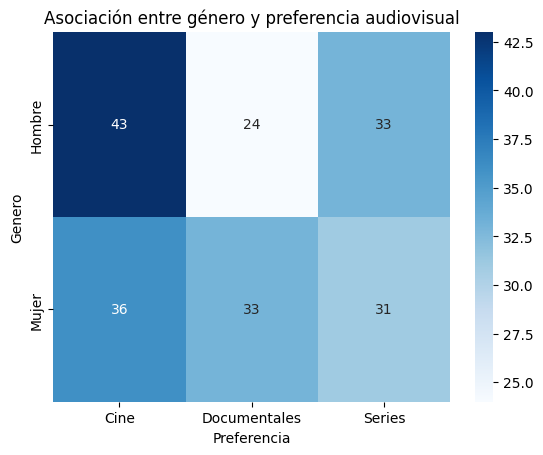

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

# Datos simulados
df = pd.DataFrame({
    "Genero": np.random.choice(["Hombre", "Mujer"], 200),
    "Preferencia": np.random.choice(["Cine", "Series", "Documentales"], 200)
})

# Tabla de contingencia
tabla = pd.crosstab(df["Genero"], df["Preferencia"])
print(tabla)

# Test chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)
print("Chi-cuadrado:", chi2)
print("p-valor:", p)

# Cálculo V de Cramér
n = tabla.sum().sum()
V = np.sqrt(chi2 / (n * (min(tabla.shape) - 1)))
print("V de Cramér:", V)

# Heatmap
sns.heatmap(tabla, annot=True, cmap="Blues")
plt.title("Asociación entre género y preferencia audiovisual")
plt.show()


---
### Resumen final

El análisis bivariante con variables categóricas incluye:

1. Construir una tabla de contingencia → ver las combinaciones posibles.

2. Aplicar un test de chi-cuadrado → comprobar si existe relación.

3. Calcular una medida de fuerza (Phi o V de Cramér).

4. Visualizar la asociación usando mapas de calor o barras agrupadas.

5. Interpretar si la relación es débil, moderada o fuerte.

---
# Análisis de Datos (Bivariante): Combinada categórica-numérica

### 1. Qué significa el caso categórica–numérica

Tienes:

* Una variable categórica → divide los datos en grupos (p. ej. género, tipo de cliente, clase social).

* Una variable numérica → representa un valor medible (p. ej. salario, edad, puntuación, ventas).

Aquí el objetivo es analizar cómo cambia la variable numérica según los grupos de la categórica.

Ejemplos típicos:

* Salario según género

* Gastos según tipo de cliente

* Nota según tipo de colegio

* Colesterol según hábito de fumar

---

### 2. Qué preguntas resuelve este análisis
✔️ ¿Las medias o medianas difieren entre los grupos?

Ej.: ¿los hombres cobran lo mismo que las mujeres?

✔️ ¿La variabilidad es distinta entre categorías?

Ej.: ¿un tipo de cliente gasta con mayor dispersión que otro?

✔️ ¿El grupo influye en la variable numérica?

Es decir, si hay evidencia estadística de que el grupo “marca diferencia”.

---

### 3. Métodos principales del análisis
🔹 1. Comparación de medias o medianas

Es lo más directo.

* Si hay dos grupos → t-test (prueba t de Student).

* Si hay tres o más grupos → ANOVA (análisis de varianza).

Ambos miden si los grupos tienen valores diferentes “más allá del azar”.

🔹 2. Visualización

Fundamental para entender el comportamiento real.

✔️ Boxplot

Muestra:

* Mediana

* Rango intercuartílico

* Valores extremos (outliers)

Es la herramienta más clara para este tipo de análisis.

✔️ Violinplot

Muestra la distribución completa (densidad).
Es más rico que el boxplot.

✔️ Barplot (media + intervalos de confianza)

Útil cuando los grupos son pocos.

✔️ Stripplot / swarmplot

Muestran cada punto individual.

🔹 3. Medidas estadísticas descriptivas

Comparar por categoría:

* media

* mediana

* desviación estándar

* mínimos y máximos

* percentiles

Esto ayuda a ver si:

* un grupo tiene valores más altos,

* uno es más variable,

* o uno es más homogéneo.

---

### 4. Ejemplo conceptual sencillo

Supongamos:

* Variable categórica: Género → Hombre, Mujer

* Variable numérica: Salario

Tabla de medias por categoría:

| Género | Media salario |
| ------ | ------------- |
| Hombre | 2100 €        |
| Mujer  | 1980 €        |

Visualización:

* El boxplot de mujeres está ligeramente más bajo.

* El de hombres tiene más dispersión (mayor rango).

¿Es la diferencia significativa?

Con un t-test:

* p-valor < 0.05 → la diferencia es estadísticamente significativa.

* p-valor >= 0.05 → no se puede afirmar que haya diferencia real.

---

### 5. Ejemplo completo en Python (NumPy, Pandas, Seaborn)

Aquí tienes un ejemplo listo para copiar y ejecutar en tu entorno:

        count         mean         std          min          25%          50%  \
Genero                                                                          
Hombre  151.0  2022.388018  284.623119  1027.619798  1812.353694  2017.462616   
Mujer   149.0  1909.741188  295.461236  1292.457224  1669.795731  1924.562242   

                75%          max  
Genero                            
Hombre  2235.336121  2657.136688  
Mujer   2076.495162  3055.819447  

T-Statistic: 3.363236872280113
p-valor: 0.00087103263260471


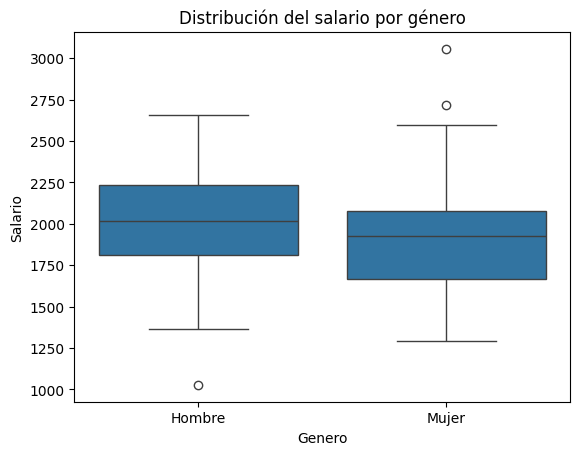

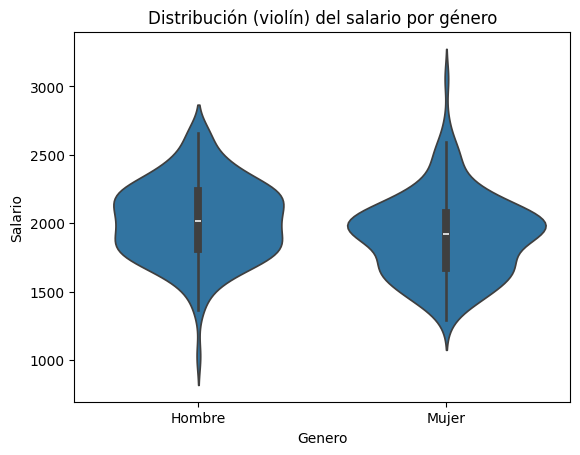

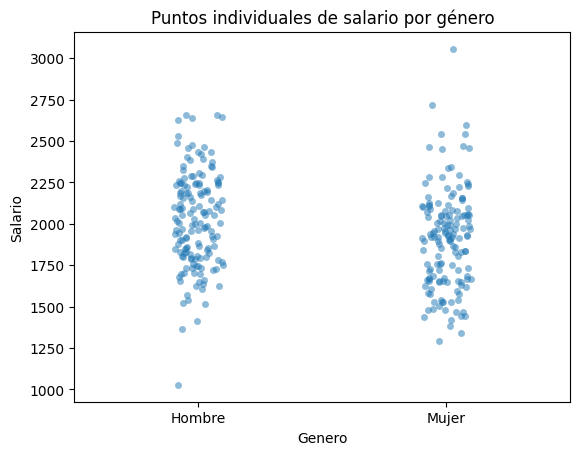

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --------------------------
# 1. Crear datos simulados
# --------------------------
np.random.seed(42)

df = pd.DataFrame({
    "Genero": np.random.choice(["Hombre", "Mujer"], 300),
    "Salario": np.random.normal(2000, 300, 300)
})

# Ajuste para crear diferencia realista
df.loc[df["Genero"] == "Mujer", "Salario"] -= 100  

# --------------------------
# 2. Comparación estadística
# --------------------------

# Tabla descriptiva
print(df.groupby("Genero")["Salario"].describe())

# t-test (dos grupos)
sal_h = df[df["Genero"] == "Hombre"]["Salario"]
sal_m = df[df["Genero"] == "Mujer"]["Salario"]
t, p = ttest_ind(sal_h, sal_m)

print("\nT-Statistic:", t)
print("p-valor:", p)

# --------------------------
# 3. Visualización
# --------------------------

# Boxplot
sns.boxplot(data=df, x="Genero", y="Salario")
plt.title("Distribución del salario por género")
plt.show()

# Violinplot
sns.violinplot(data=df, x="Genero", y="Salario")
plt.title("Distribución (violín) del salario por género")
plt.show()

# Stripplot (visualiza puntos individuales)
sns.stripplot(data=df, x="Genero", y="Salario", jitter=True, alpha=0.5)
plt.title("Puntos individuales de salario por género")
plt.show()


---

### 6. Interpretación final del análisis

Cuando encuentras diferencias por grupo, debes valorar:

✔️ ¿Son diferencias estadísticas?

(p-valor del t-test/ANOVA)

✔️ ¿Son diferencias importantes en la práctica?

(media, mediana, tamaño del efecto)

✔️ ¿Cómo se comporta la distribución?

(Caídas bruscas, colas largas, outliers)

✔️ ¿Qué implicaciones tiene?

(por ejemplo, si los clientes “VIP” gastan más, ajustas estrategias de negocio)

---

### Resumen final

El análisis categórica–numérica sirve para:

* Comparar la variable numérica entre grupos.

* Ver si los grupos influyen en el comportamiento.

* Identificar patrones, diferencias y anomalías.

* Evaluar si las diferencias son reales mediante pruebas estadísticas.

* Visualizar claramente la dispersión y distribución.